# **Project Name**    - Coronavirus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Mayank Gupta
##### **Team Member 2 -** Dheeraj Patel
##### **Team Member 3 -** Rozi Fatma


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
pd.pandas.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline
%load_ext google.colab.data_table
from PIL import Image
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import re # for regular expressions
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words('english') # load stop words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np
from numpy import math
pd.pandas.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext google.colab.data_table

import re # for regular expressions
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words('english') # load stop words
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
import gensim

from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


### Dataset Loading

In [ ]:
# Load Dataset
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#load the Cororna Tweet Sentiment Analysis Data
df_corona = pd.read_csv('/content/Coronavirus Tweets (2).csv',encoding='latin-1')

### Dataset First View

In [ ]:
# Dataset First Look
df_corona.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df_corona.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_corona.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df_corona.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_corona.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Length: 41157, dtype: bool

In [ ]:
df_corona.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_corona.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In the location column we have found null values.

In [ ]:
df_corona['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
sizes = df_corona.Location.value_counts()
sizes

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
null_count = df_corona['Location'].isnull().sum()
not_null_count = df_corona['Location'].count()
print(null_count)
print(not_null_count)

8590
32567


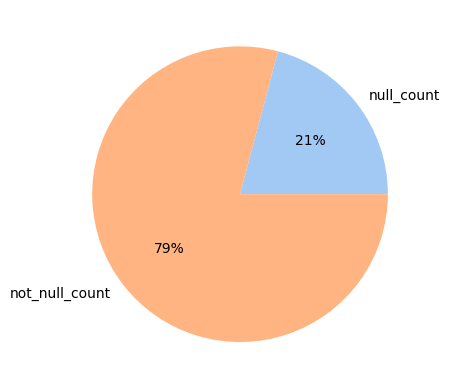

In [ ]:
# Visualizing the missing values
null_count = df_corona['Location'].isnull().sum()
not_null_count = df_corona['Location'].count()

data = [null_count, not_null_count]
labels = ['null_count', 'not_null_count']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Here we have found that there 21% null values

In [ ]:
#finding the mode for 
df_corona['Location'].mode()

0    London
Name: Location, dtype: object

In [ ]:
#To handle the null values in the column[Location]

df_corona.fillna('London', inplace =True)

In [ ]:
df_corona.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

### What did you know about your dataset?

- In our dataset we have 6 columns and 41157 rows. Out of which 3 columns are catagorical and rest are numerial.
- These are five types of sentiments in the sentiments coulumn i.e, 'Exremely Positive' 'Positive', 'Negative', 'Exremely Negative' and 'Neutral'


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(df_corona.columns)

['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

In [ ]:
# Dataset Describe
df_corona.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserName,41157.0,NaN,NaN,NaN,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,NaN,NaN,NaN,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0
Location,41157,12220,London,9130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TweetAt,41157,30,20-03-2020,3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,41157,5,Positive,11422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

- Username and ScreenName both are Distinct columns  

### Check Unique Values for each variable.

In [ ]:
# Custom Function for Dtype,Unique values and Null values
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [ ]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",df_corona.shape,"\n") 
# Custom Function
datainfo(df_corona)

Total Rows and Columns in DataFrame is : (41157, 6) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
UserName,int64,41157,41157,0,0.0
ScreenName,int64,41157,41157,0,0.0
Location,object,41157,12220,0,0.0
TweetAt,object,41157,30,0,0.0
OriginalTweet,object,41157,41157,0,0.0
Sentiment,object,41157,5,0,0.0


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df_corona['OriginalTweet'] = df_corona['OriginalTweet'].astype('str')
df_corona['Sentiment'] = df_corona['Sentiment'].astype('str')

In [ ]:
# Working on the Sentiment column
df_corona['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
# Converting Extremly positive sentiment into positive & same as for extremly negative
df_corona['Sentiment'].replace('Extremely Positive','Positive', inplace = True)
df_corona['Sentiment'].replace('Extremely Negative','Negative', inplace = True)
df_corona['Sentiment'].replace('Neutral','Neutral', inplace = True)

In [ ]:
# Data has 5 clases of Sentiments,convert them into 3
df_corona['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

## Step-1 Exploratory Data Analysis on the given Data 

In [ ]:
# Making a copy of our data
data_1 = df_corona.copy()

## Sentiment Analysis

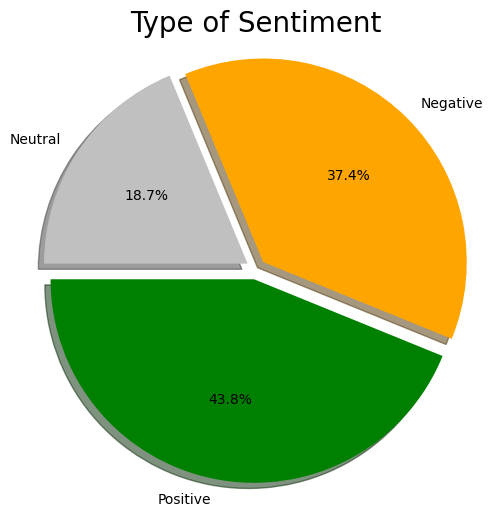

In [ ]:
# count plot on Sentiment categorical variable
labels = 'Positive' , 'Negative', 'Neutral'
sizes = data_1.Sentiment.value_counts()
colors = ['green', 'orange', 'silver']
explode = (0.05, 0.05, 0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Type of Sentiment",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

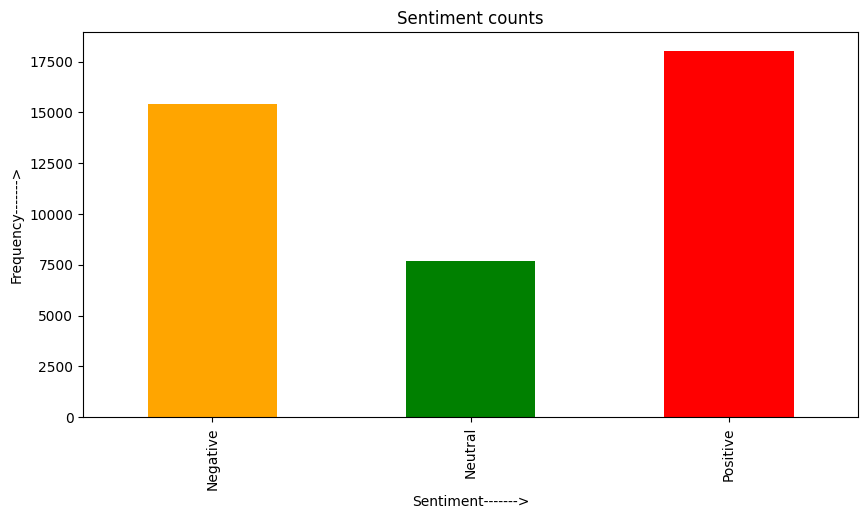

In [ ]:
# ploting frequency for "Sentiment" column

counts = data_1['Sentiment'].value_counts().sort_index()
fig,ax=plt.subplots(figsize=(10,5))
counts.plot.bar(ax = ax, color=['orange', 'green', 'red'])
ax.set_title('Sentiment counts')
ax.set_xlabel('Sentiment------->') 
ax.set_ylabel("Frequency------->")
plt.show()

Number of characters in tweet for each type of sentiments.

In [ ]:
#let's find the numberof characters in each type of tweets.
tweet_Positive = data_1[data_1['Sentiment'] == "Positive"]["OriginalTweet"].str.len()
tweet_Negative = data_1[data_1['Sentiment'] == "Negative"]["OriginalTweet"].str.len()
tweet_Neutral = data_1[data_1['Sentiment'] == "Neutral"]["OriginalTweet"].str.len()

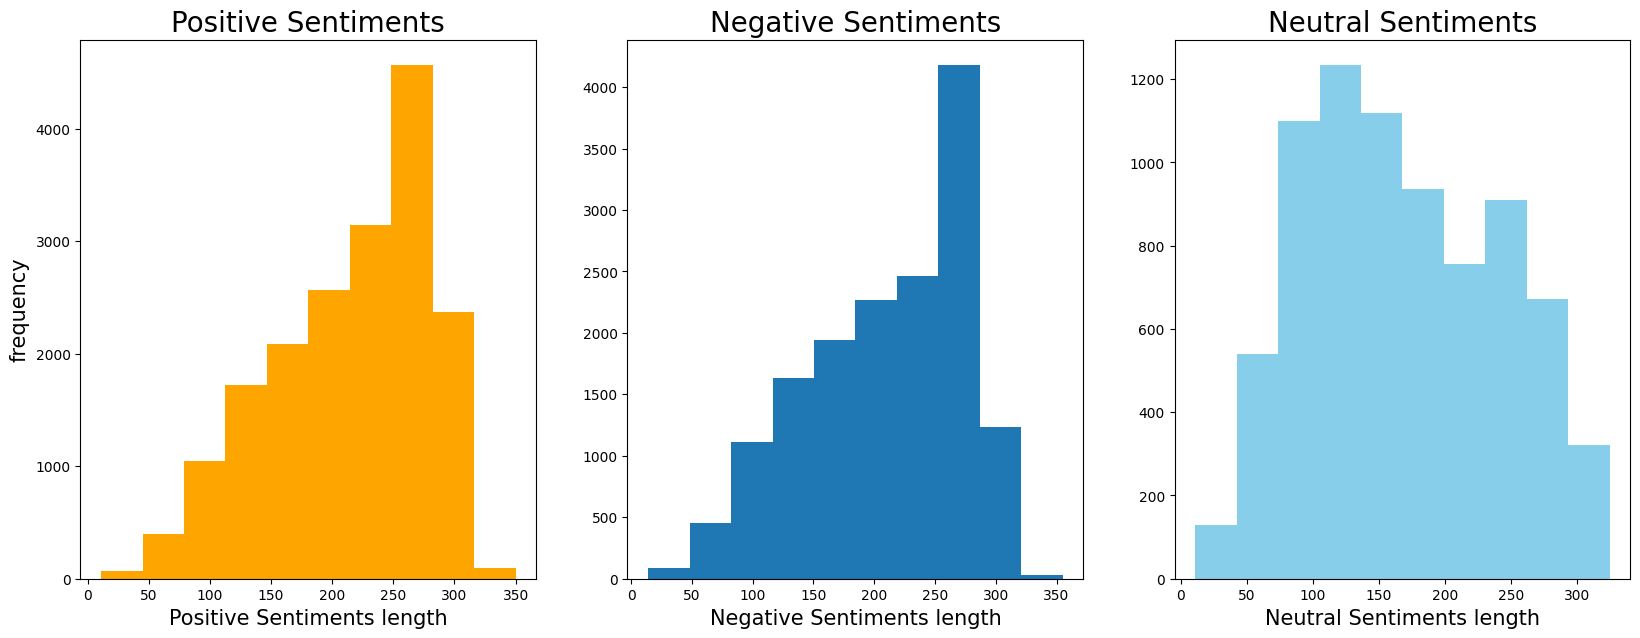

In [ ]:
#Plotting histogram for length of tweets of each type of sentiment
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,7))


# Histogram for Positive Sentiments
ax1.hist(tweet_Positive,color='orange')
ax1.set_title('Positive Sentiments', fontsize = 20)
ax1.set_xlabel('Positive Sentiments length', fontsize = 15)
ax1.set_ylabel('frequency', fontsize = 15)

# Histogram for Negative Sentiments
ax2.hist(tweet_Negative)
ax2.set_title('Negative Sentiments',fontsize = 20)
ax2.set_xlabel('Negative Sentiments length', fontsize = 15)

# Histogram for Neutral Sentiments
ax3.hist(tweet_Neutral,color='skyblue')
ax3.set_title('Neutral Sentiments', fontsize = 20)
ax3.set_xlabel('Neutral Sentiments length', fontsize = 15)

plt.show()

- From the graph we can infer that when the sentiments is positive, most of tweet length ranges from 250 to 300.
- For Negative sentiments also it ranges from 250 to 300.
- And for Neutral sentiments it ranges from 100 to 150.

DATA PROCESSING

In [ ]:
# Dwonloading stopwords from nltk library 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
remove_word="https"

In [ ]:
# defining a function to remove the stopwords and punctuations
def data_processing(tweet):
  tweet = tweet.lower()
  tweet = nltk.word_tokenize(tweet)

  t_list = []
  for i in tweet:
    if i.isalnum():
      t_list.append(i)

  tweet = t_list[:]
  t_list.clear()

  for i in tweet:
    if i not in stop and i not in string.punctuation and i not in remove_word:
      t_list.append(i)    
  listToStr = ' '.join([str(elem) for elem in t_list])
  return listToStr


In [ ]:
data_1['Transformed_Tweet'] = data_1['OriginalTweet'].apply(data_processing)

In [ ]:
data_1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Transformed_Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,London,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...
4,3803,48755,London,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid19 outbreak paranoid...
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering stock supermarket shel...
41153,44952,89904,London,14-04-2020,Response to complaint not provided citing COVI...,Negative,response complaint provided citing related del...
41154,44953,89905,London,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,know getting tough kameronwilds rationing toil...
41155,44954,89906,London,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanitizer starting turn coron...


In [ ]:
df=pd.DataFrame(data_1[['Transformed_Tweet','Sentiment']])
df

,Transformed_Tweet,Sentiment
0,menyrbie chrisitv,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock one empty please panic enough food ...,Positive
4,ready go supermarket covid19 outbreak paranoid...,Negative
...,...,...
41152,airline pilots offering stock supermarket shel...,Neutral
41153,response complaint provided citing related del...,Negative
41154,know getting tough kameronwilds rationing toil...,Positive
41155,wrong smell hand sanitizer starting turn coron...,Neutral


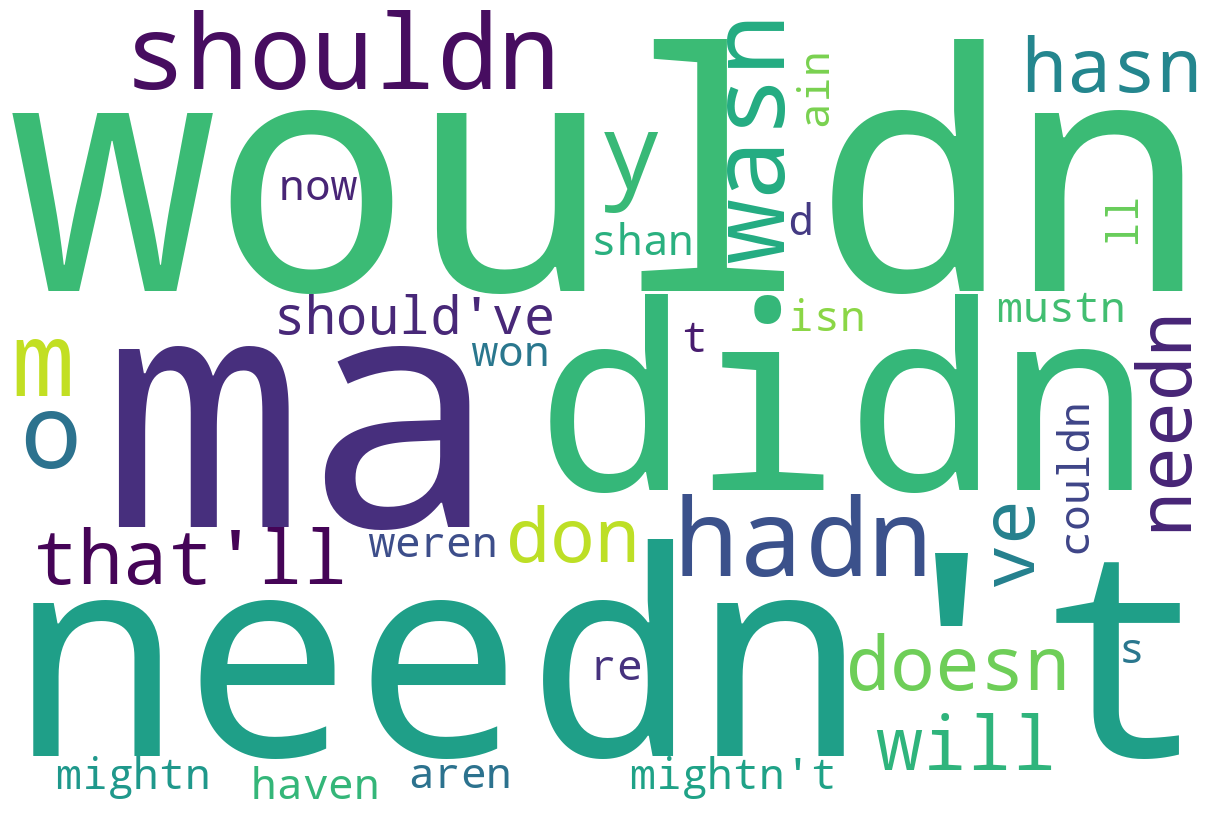

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
comment_words = '' 
stopwords= set(STOPWORDS)

for val in stop:     
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split()   
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()  
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 6).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

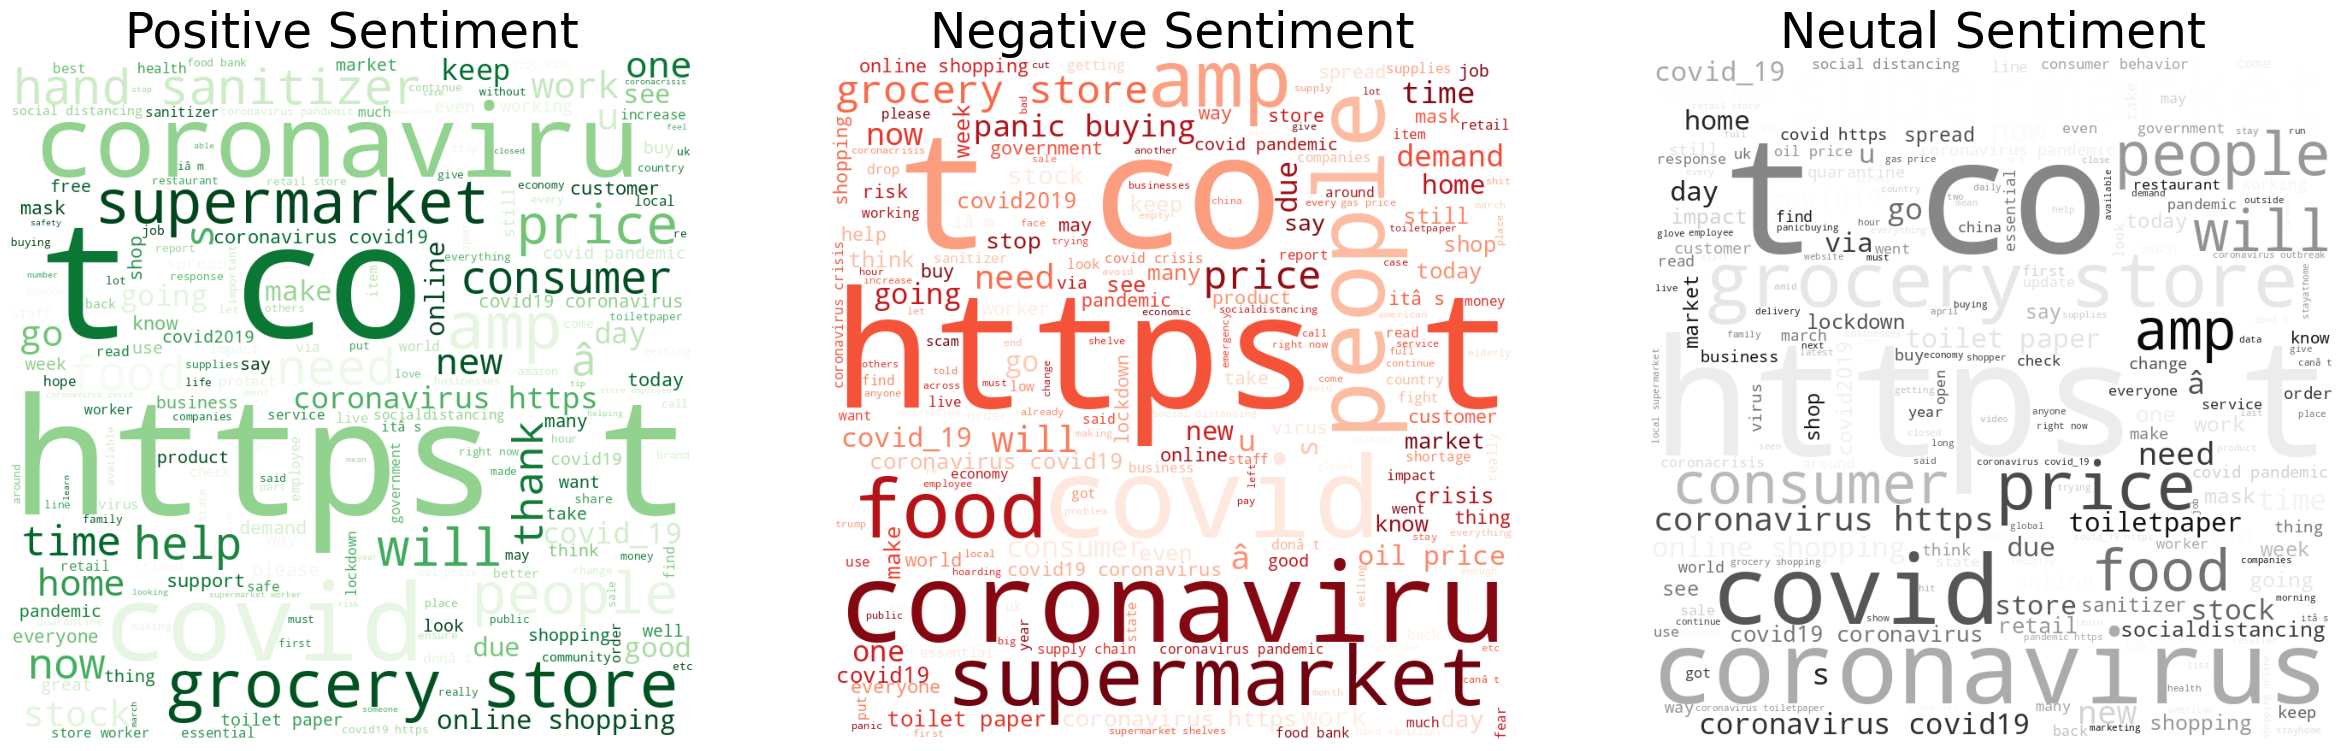

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

data_pos = data_1[data_1["Sentiment"]=="Positive"]
data_neg = data_1[data_1["Sentiment"]=="Negative"]
data_neu = data_1[data_1["Sentiment"]=="Neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in data_pos.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                # stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in data_neg.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                # stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in data_neu.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                # stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutal Sentiment',fontsize=35);

## Number of words in Tweet

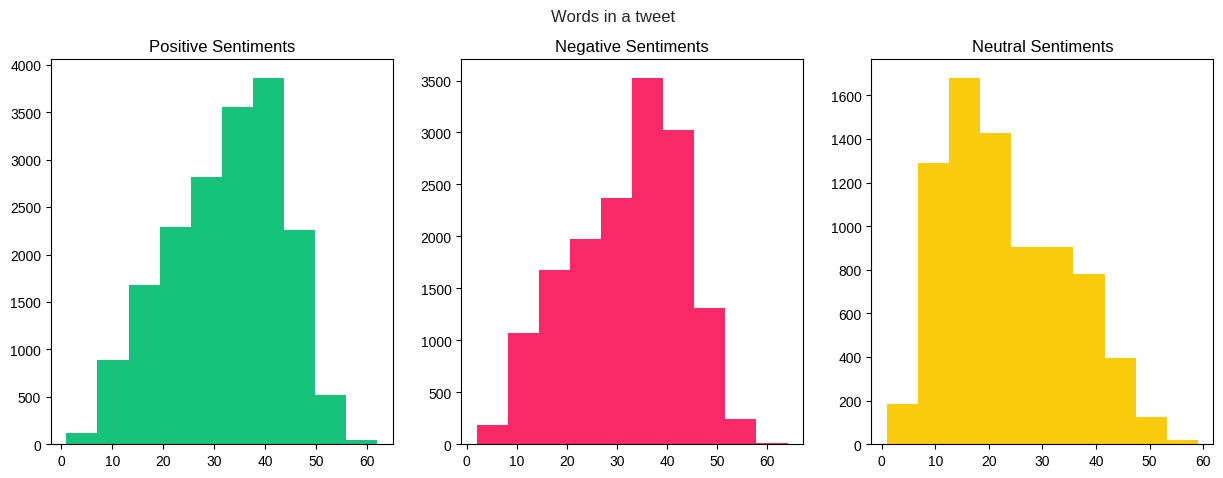

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
plt.style.use('seaborn')
# Histogram for Positive Sentiments
tweet=data_1[data_1['Sentiment']=="Positive"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet,color='#17C37B')
ax1.set_title('Positive Sentiments')

# Histogram for Negative Sentiments
tweet=data_1[data_1['Sentiment']=="Negative"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet,color='#F92969')
ax2.set_title('Negative Sentiments')

# Histogram for Neutral Sentiments
tweet=data_1[data_1['Sentiment']=="Neutral"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax3.hist(tweet,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a tweet')
plt.show()

In [ ]:
def create_corpus(target):
    corpus=[] 
    for x in data_1[data_1['Sentiment']==target ]['OriginalTweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

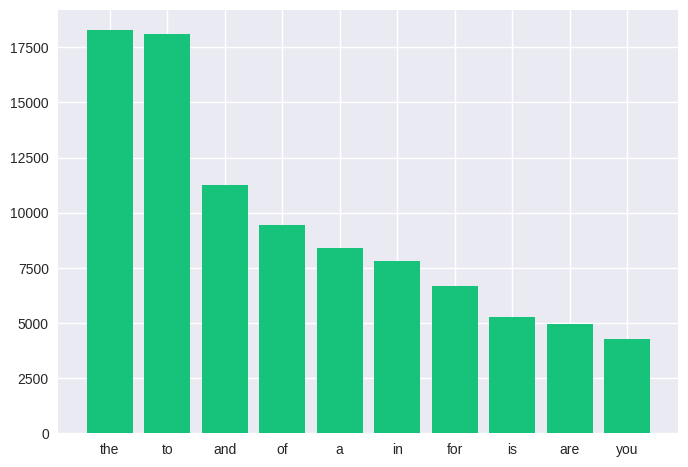

In [ ]:
# Stopwords in Positive sentiments
corpus=create_corpus("Positive")
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 10 artists>

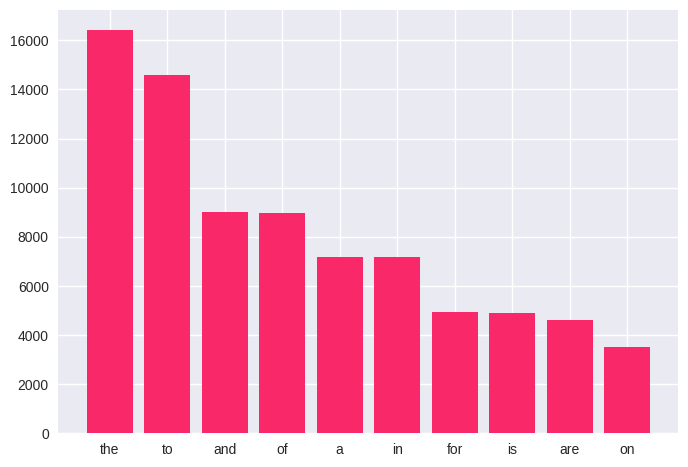

In [ ]:
# Stopwords in Negative sentiments
corpus=create_corpus("Negative")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
          
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

<BarContainer object of 10 artists>

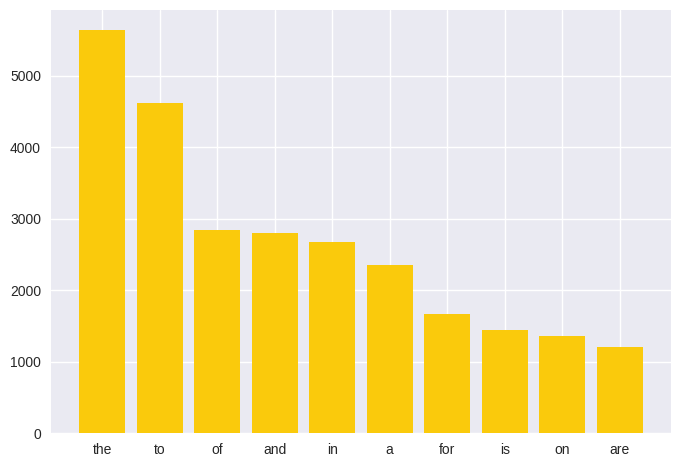

In [ ]:
# Stopwords in Neutral sentiments
corpus=create_corpus("Neutral")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
               
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#FACA0C')

##Punctuations

<BarContainer object of 27 artists>

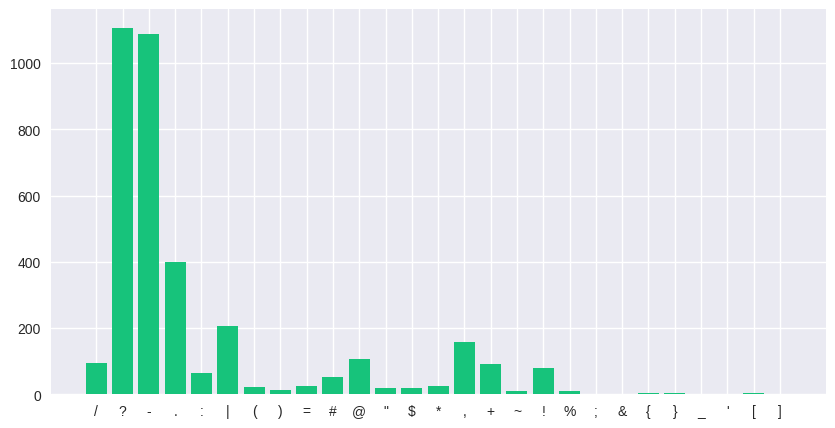

In [ ]:
# Punctuations in Positive sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

<BarContainer object of 25 artists>

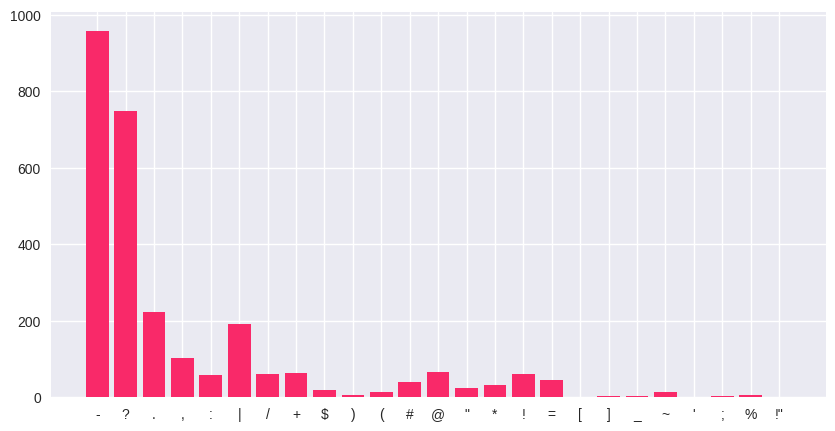

In [ ]:
# Punctuations in Negative sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')

<BarContainer object of 23 artists>

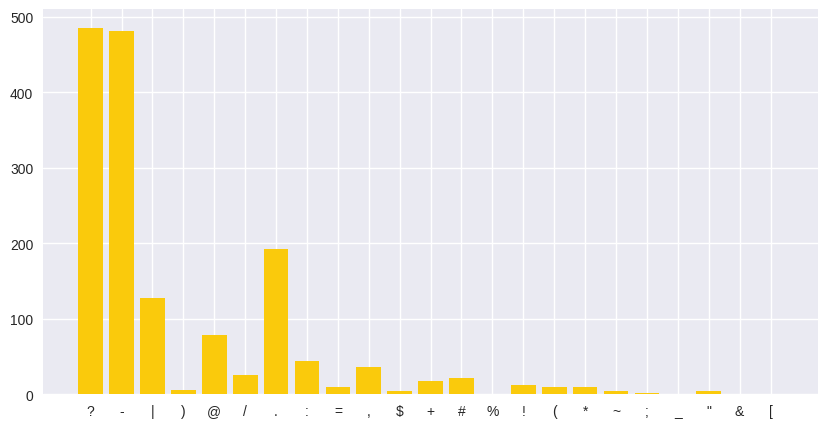

In [ ]:
# Punctuations in Neutral sentiments
plt.figure(figsize=(10,5))
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

        
x,y=zip(*dic.items())
plt.bar(x,y,color='#FACA0C')

## Common Words

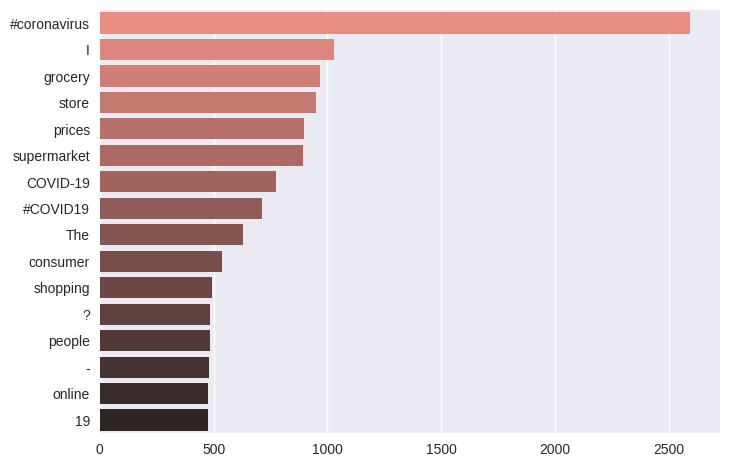

In [ ]:
# Barplot for significant words
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x,palette="dark:salmon_r"); 

## Hastag

<Axes: xlabel='Hashtag', ylabel='count'>

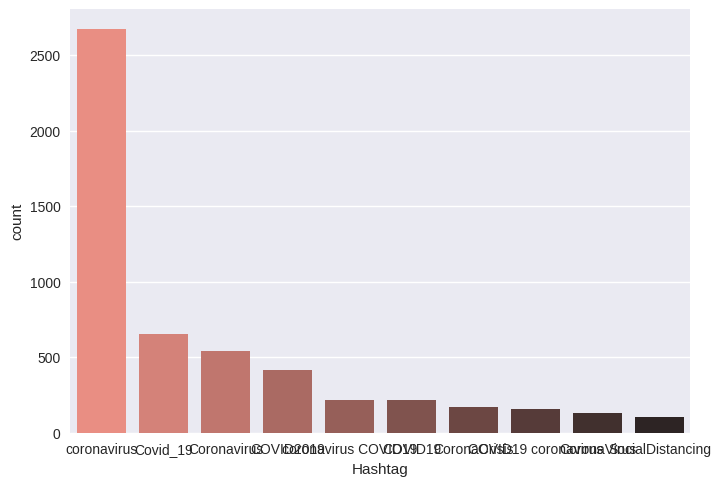

In [ ]:
import re 
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=#)\w+',OriginalTweet)
    return " ".join(line)
data_1['hash']=data_1['OriginalTweet'].apply(lambda x:find_hash(x))
temp=data_1['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
sns.barplot(x="Hashtag",y="count", data = temp,palette="dark:salmon_r")

## Mentions

<Axes: xlabel='Mentions', ylabel='count'>

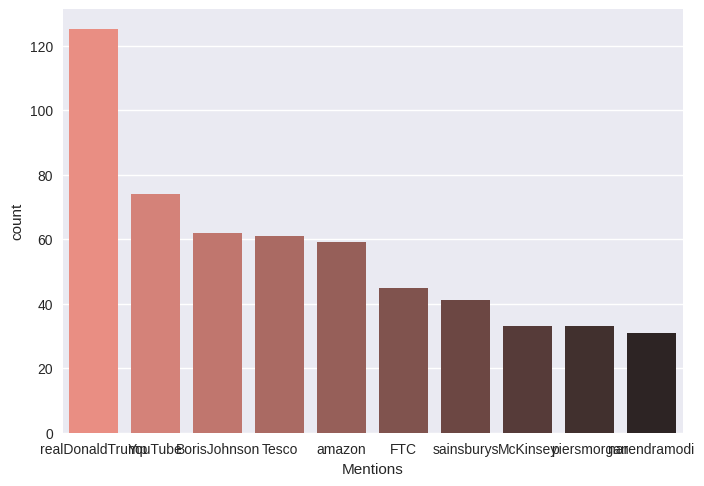

In [ ]:
def mentions(OriginalTweet):
    line=re.findall(r'(?<=@)\w+',OriginalTweet)
    return " ".join(line)
data_1['mentions']=data_1['OriginalTweet'].apply(lambda x:mentions(x))

temp=data_1['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp,palette="dark:salmon_r")

## Test Split/ Testing

In [ ]:
data_1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Transformed_Tweet,hash,mentions
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie chrisitv,,MeNyrbie Phil_Gahan Chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,,
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,,
3,3802,48754,London,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...,COVID19france COVID_19 COVID19 coronavirus con...,
4,3803,48755,London,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid19 outbreak paranoid...,COVID19 coronavirus CoronavirusFrance restezch...,
...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering stock supermarket shel...,NZ COVID,
41153,44952,89904,London,14-04-2020,Response to complaint not provided citing COVI...,Negative,response complaint provided citing related del...,,
41154,44953,89905,London,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,know getting tough kameronwilds rationing toil...,coronavirus toiletpaper,KameronWilds kroger
41155,44954,89906,London,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanitizer starting turn coron...,coronavirus COVID19 coronavirus,


In [ ]:
df

,Transformed_Tweet,Sentiment
0,menyrbie chrisitv,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock one empty please panic enough food ...,Positive
4,ready go supermarket covid19 outbreak paranoid...,Negative
...,...,...
41152,airline pilots offering stock supermarket shel...,Neutral
41153,response complaint provided citing related del...,Negative
41154,know getting tough kameronwilds rationing toil...,Positive
41155,wrong smell hand sanitizer starting turn coron...,Neutral


In [ ]:
#label encoding
df["Sentiment"].replace({"Negative":0,"Neutral":1,'Positive':2},inplace=True)

In [ ]:
# Import train_test_split from sklearn library to make split of data_M into train sets and validation sets
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.Sentiment.values) 
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input data_Mset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

train_inputs = vectorizer.fit_transform(train.Transformed_Tweet.values)
test_inputs = vectorizer.transform(test.Transformed_Tweet.values)

train_targets = train.Sentiment.values
test_targets = test.Sentiment.values

print("train_inputs.shape : ", train_inputs.shape)
print("test_inputs.shape : ", test_inputs.shape)
print("train_targets.shape : ", train_targets.shape)
print("test_targets.shape : ", test_targets.shape)

train_inputs.shape :  (32925, 46437)
test_inputs.shape :  (8232, 46437)
train_targets.shape :  (32925,)
test_targets.shape :  (8232,)


In [ ]:
models = [
          ['NaiveByes_clf: ',               MultinomialNB()],
          ['SGD_clf: ',                     SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=42)],
          ['RandomForest_clf: ',            RandomForestClassifier(random_state=42)],
          ['SupportVector_clf: ',           SVC()],
          ['Logistic_clf: ',                LogisticRegression()]
]   

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name
    start = time.time()
    model.fit(train_inputs,train_targets) 
    end = time.time()
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_Accuracy"] = metrics.accuracy_score(train_targets, model.predict(train_inputs))
    # Validation set
    model_data_dic["Test_Accuracy"] = metrics.accuracy_score(test_targets, model.predict(test_inputs))

    model_data.append(model_data_dic)

In [ ]:
# Convert list to dataframe
df_model = pd.DataFrame(model_data)
print(df_model)

                  Name  Train_Time  Train_Accuracy  Test_Accuracy
0      NaiveByes_clf:     0.023120        0.817677       0.680637
1            SGD_clf:     0.777974        0.954958       0.823737
2   RandomForest_clf:   139.960570        0.999909       0.759961
3  SupportVector_clf:   863.598644        0.948489       0.769436
4       Logistic_clf:     9.797132        0.973242       0.805272


#Converting multiclass classification into binary classification

In [ ]:
def target_to_binary(x):
    if x=='Positive':
       return 1
    elif x=='Neutral':
       return 1
    else:
       return 0

In [ ]:
# Filter columns
df_binary=data_1[["Transformed_Tweet","Sentiment"]]

#Training and Validation Set for Binary class Classification
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [ ]:
df_binary["Sentiment"]=df_binary['Sentiment'].apply(target_to_binary)
df_binary

,Transformed_Tweet,Sentiment
0,menyrbie chrisitv,1
1,advice talk neighbours family exchange phone n...,1
2,coronavirus australia woolworths give elderly ...,1
3,food stock one empty please panic enough food ...,1
4,ready go supermarket covid19 outbreak paranoid...,0
...,...,...
41152,airline pilots offering stock supermarket shel...,1
41153,response complaint provided citing related del...,0
41154,know getting tough kameronwilds rationing toil...,1
41155,wrong smell hand sanitizer starting turn coron...,1


In [ ]:
# Import train_test_split from sklearn library to make split of data into train sets and validation sets
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_binary,test_size = 0.2,random_state=0,stratify = df_binary.Sentiment.values) 
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


#Use Of Counter Vectorizer For Binary Class Classification

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

train_inputs = vectorizer.fit_transform(train.Transformed_Tweet.values)
test_inputs = vectorizer.transform(test.Transformed_Tweet.values)

train_targets = train.Sentiment.values
test_targets = test.Sentiment.values

print("train_inputs.shape : ", train_inputs.shape)
print("val_inputs.shape : ", test_inputs.shape)
print("train_targets.shape : ", train_targets.shape)
print("val_targets.shape : ", test_targets.shape)

train_inputs.shape :  (32925, 46644)
val_inputs.shape :  (8232, 46644)
train_targets.shape :  (32925,)
val_targets.shape :  (8232,)


#Model Comparisons for Binary class Classification

In [ ]:
# Instantiate models
models = [
          ['NaiveByes_clf: ',               MultinomialNB()],
          ['SGD_clf: ',                     SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=42)],
          ['RandomForest_clf: ',            RandomForestClassifier(random_state=42)],
          ['SupportVector_clf: ',           SVC()],
          ['Logistic_clf: ',                LogisticRegression()]
] 

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name
    start = time.time()
    model.fit(train_inputs,train_targets) 
    end = time.time()
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_Accuracy"] = metrics.accuracy_score(train_targets, model.predict(train_inputs))
    # Validation set
    model_data_dic["Test_Accuracy"] = metrics.accuracy_score(test_targets, model.predict(test_inputs))

    model_data.append(model_data_dic)

In [ ]:
# Convert list to dataframe
df = pd.DataFrame(model_data)
print(df)

                  Name  Train_Time  Train_Accuracy  Test_Accuracy
0      NaiveByes_clf:     0.015689        0.888535       0.790695
1            SGD_clf:     0.267050        0.963007       0.861395
2   RandomForest_clf:   107.705238        0.999909       0.826652
3  SupportVector_clf:   691.963132        0.962551       0.830418
4       Logistic_clf:     2.390465        0.965680       0.859815


In [ ]:
# Instantiate Logistic regression model
from sklearn.linear_model import LogisticRegression

log_clf= LogisticRegression()
log_clf.fit(train_inputs,train_targets)

LogisticRegression()

In [ ]:
from sklearn.metrics import plot_confusion_matrix


ImportError: ignored

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Function for performance metrics
def report(model):
    preds = model.predict(test_inputs)
    accuracy=accuracy_score(test_targets,preds)
    print(accuracy)
    print(classification_report(test_targets,preds))
    

In [ ]:
print("Logistic Regression")
report(log_clf)

Logistic Regression
0.8598153547133139
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      3080
           1       0.87      0.92      0.89      5152

    accuracy                           0.86      8232
   macro avg       0.86      0.84      0.85      8232
weighted avg       0.86      0.86      0.86      8232



In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_inputs,train_targets) 


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844100 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.825887 (0.003727) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829542 (0.004320) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.825887 (0.003738) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.837034 (0.002994) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.838249 (0.003078) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837044 (0.003016) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.844029 (0.002784) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.844100 (0.002887) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.844029 (0.002826) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.819965 (0.002182) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.819965 (0.002182) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820258 (0.002322) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.747720 (0.002072) with: {

In [ ]:
# Tuned Model
from sklearn.linear_model import LogisticRegression

tune_model= LogisticRegression(C=0.5,penalty="l1",solver="liblinear")
tune_model.fit(train_inputs,train_targets) 

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [ ]:
print("Logistic Regression")
report(tune_model)

Logistic Regression
0.8724489795918368
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      3080
           1       0.87      0.93      0.90      5152

    accuracy                           0.87      8232
   macro avg       0.87      0.85      0.86      8232
weighted avg       0.87      0.87      0.87      8232



In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (0.8892 - 0.878) / 0.878))

Improvement of 1.28%.


Road map for doing ML
- 1- Random Forest Classifier
- 2- Adaboost
- 3- Gradientboost
- 4- Exxgboost
- 5- Naive Bias
- 6- Support Vector Machine
- 7- KNN
- 8- Model Explanabilty
- 9- Mathematics Hypothesis Testing
- 10-feature scaling
- 11-feature transformation
- 12-outlier detection


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- H0: there is no diffrence in the sentiments throught the year
- H1: there is a positive sentiments throught the year

#### 2. Perform an appropriate statistical test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***